In [1]:
#Import needed libraries
import os, shutil
from PIL import Image, ImageOps

#Standard Libraries
import numpy as np
import pandas as pd

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay

#TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models, layers, optimizers, regularizers
from tensorflow.keras import Model
from tensorflow.data.experimental import cardinality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Transfer Learning
from keras.applications import ResNet50, VGG19, VGG16

In [54]:
# import the required libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *  # import the vision module
from fastai.metrics import error_rate  # import our evaluation metric
import zipfile # import module to unzip the data
import urllib.request
import os # import module to access file paths

In [2]:
import zipfile
import os

zip_path = '/content/EuroSAT.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/EuroSAT')

# Define paths for each category within the extracted '2750' folder
data_AnnualCrop = '/content/EuroSAT/2750/AnnualCrop'
data_Forest = '/content/EuroSAT/2750/Forest'
data_HerbaceousVegetation = '/content/EuroSAT/2750/HerbaceousVegetation'
data_Highway = '/content/EuroSAT/2750/Highway'
data_Industrial = '/content/EuroSAT/2750/Industrial'
data_Pasture = '/content/EuroSAT/2750/Pasture'
data_PermanentCrop = '/content/EuroSAT/2750/PermanentCrop'
data_Residential = '/content/EuroSAT/2750/Residential'
data_River = '/content/EuroSAT/2750/River'
data_SeaLake = '/content/EuroSAT/2750/SeaLake'




In [4]:
zip_path = '/content/split_dataset.zip'

# Extract only the 'split' folder from the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files and directories in the zip
    for file in zip_ref.namelist():
        if file.startswith('data/split/'):  # Only extract files in the 'split' folder
            zip_ref.extract(file, '/content/')

# Define path to the extracted 'split' folder
new_dir = '/content/data/split/'

In [5]:
#Create objects that store all the relevant image names.
imgs_AnnualCrop = [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest = [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation = [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway = [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial = [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture = [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop = [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential = [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River = [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake = [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]

In [6]:
# Define the path to the new split folder
new_dir = '/content/data/split/'

# Create the necessary parent directory before making the split folder
os.makedirs(new_dir, exist_ok=True)



In [7]:
#Set up the Train folder and subfolders
train_folder = os.path.join(new_dir, 'train')
train_AnnualCrop = os.path.join(train_folder, 'AnnualCrop')
train_Forest = os.path.join(train_folder, 'Forest')
train_HerbaceousVegetation = os.path.join(train_folder, 'HerbaceousVegetation')
train_Highway = os.path.join(train_folder, 'Highway')
train_Industrial = os.path.join(train_folder, 'Industrial')
train_Pasture = os.path.join(train_folder, 'Pasture')
train_PermanentCrop = os.path.join(train_folder, 'PermanentCrop')
train_Residential = os.path.join(train_folder, 'Residential')
train_River = os.path.join(train_folder, 'River')
train_SeaLake = os.path.join(train_folder, 'SeaLake')


In [8]:
#Set up the Test folder and subfolders
test_folder = os.path.join(new_dir, 'test')
test_AnnualCrop = os.path.join(test_folder, 'AnnualCrop')
test_Forest = os.path.join(test_folder, 'Forest')
test_HerbaceousVegetation = os.path.join(test_folder, 'HerbaceousVegetation')
test_Highway = os.path.join(test_folder, 'Highway')
test_Industrial = os.path.join(test_folder, 'Industrial')
test_Pasture = os.path.join(test_folder, 'Pasture')
test_PermanentCrop = os.path.join(test_folder, 'PermanentCrop')
test_Residential = os.path.join(test_folder, 'Residential')
test_River = os.path.join(test_folder, 'River')
test_SeaLake = os.path.join(test_folder, 'SeaLake')

In [9]:
# Make the Train directories(folders)
os.mkdir(train_folder)
os.mkdir(train_AnnualCrop)
os.mkdir(train_Forest)
os.mkdir(train_HerbaceousVegetation)
os.mkdir(train_Highway)
os.mkdir(train_Industrial)
os.mkdir(train_Pasture)
os.mkdir(train_PermanentCrop)
os.mkdir(train_Residential)
os.mkdir(train_River)
os.mkdir(train_SeaLake)

# Make the Test directories(folders)
os.mkdir(test_folder)
os.mkdir(test_AnnualCrop)
os.mkdir(test_Forest)
os.mkdir(test_HerbaceousVegetation)
os.mkdir(test_Highway)
os.mkdir(test_Industrial)
os.mkdir(test_Pasture)
os.mkdir(test_PermanentCrop)
os.mkdir(test_Residential)
os.mkdir(test_River)
os.mkdir(test_SeaLake)

In [10]:
# Compile 80% of images into folders- Train
imgs = imgs_AnnualCrop[:2400]
for img in imgs:
    origin = os.path.join(data_AnnualCrop, img)
    destination = os.path.join(train_AnnualCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Forest[:2400]
for img in imgs:
    origin = os.path.join(data_Forest, img)
    destination = os.path.join(train_Forest, img)
    shutil.copyfile(origin, destination)

imgs = imgs_HerbaceousVegetation[:2400]
for img in imgs:
    origin = os.path.join(data_HerbaceousVegetation, img)
    destination = os.path.join(train_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Highway[:2000]
for img in imgs:
    origin = os.path.join(data_Highway, img)
    destination = os.path.join(train_Highway, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Industrial[:2000]
for img in imgs:
    origin = os.path.join(data_Industrial, img)
    destination = os.path.join(train_Industrial, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Pasture[:1600]
for img in imgs:
    origin = os.path.join(data_Pasture, img)
    destination = os.path.join(train_Pasture, img)
    shutil.copyfile(origin, destination)

imgs = imgs_PermanentCrop[:2000]
for img in imgs:
    origin = os.path.join(data_PermanentCrop, img)
    destination = os.path.join(train_PermanentCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Residential[:2400]
for img in imgs:
    origin = os.path.join(data_Residential, img)
    destination = os.path.join(train_Residential, img)
    shutil.copyfile(origin, destination)

imgs = imgs_River[:2000]
for img in imgs:
    origin = os.path.join(data_River, img)
    destination = os.path.join(train_River, img)
    shutil.copyfile(origin, destination)

imgs = imgs_SeaLake[:2400]
for img in imgs:
    origin = os.path.join(data_SeaLake, img)
    destination = os.path.join(train_SeaLake, img)
    shutil.copyfile(origin, destination)

In [11]:
# Compile other 20% of images into folders- Test
imgs = imgs_AnnualCrop[2400:] #600
for img in imgs:
    origin = os.path.join(data_AnnualCrop, img)
    destination = os.path.join(test_AnnualCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Forest[2400:] #600
for img in imgs:
    origin = os.path.join(data_Forest, img)
    destination = os.path.join(test_Forest, img)
    shutil.copyfile(origin, destination)

imgs = imgs_HerbaceousVegetation[2400:] #600
for img in imgs:
    origin = os.path.join(data_HerbaceousVegetation, img)
    destination = os.path.join(test_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Highway[2000:] #500
for img in imgs:
    origin = os.path.join(data_Highway, img)
    destination = os.path.join(test_Highway, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Industrial[2000:] #500
for img in imgs:
    origin = os.path.join(data_Industrial, img)
    destination = os.path.join(test_Industrial, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Pasture[1600:] #400
for img in imgs:
    origin = os.path.join(data_Pasture, img)
    destination = os.path.join(test_Pasture, img)
    shutil.copyfile(origin, destination)

imgs = imgs_PermanentCrop[2000:] #500
for img in imgs:
    origin = os.path.join(data_PermanentCrop, img)
    destination = os.path.join(test_PermanentCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Residential[2400:] #600
for img in imgs:
    origin = os.path.join(data_Residential, img)
    destination = os.path.join(test_Residential, img)
    shutil.copyfile(origin, destination)

imgs = imgs_River[2000:] #500
for img in imgs:
    origin = os.path.join(data_River, img)
    destination = os.path.join(test_River, img)
    shutil.copyfile(origin, destination)

imgs = imgs_SeaLake[2400:] #600
for img in imgs:
    origin = os.path.join(data_SeaLake, img)
    destination = os.path.join(test_SeaLake, img)
    shutil.copyfile(origin, destination)

In [12]:
train_folder = 'data/split/train'
test_folder = 'data/split/test'

# Normalize images
train_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.125)
test_gen = ImageDataGenerator(rescale=1./255)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
train_generator = train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

val_generator= train_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

test_generator= test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [13]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [14]:
#Confirm class balance for train and test
train_classes = train_generator.classes
val_classes = val_generator.classes
test_classes = test_generator.classes

#Look at image distribution by class across train, test, and validation sets.
train_class, train_count = np.unique(train_classes, return_counts=True)
val_class, val_count = np.unique(val_classes, return_counts=True)
test_class, test_count = np.unique(test_classes, return_counts=True)

print('Train ~ {}'.format(list(zip(train_class, train_count))))
print('Validation ~ {}'.format(list(zip(val_class, val_count))))
print('Test ~ {}'.format(list(zip(test_class, test_count))))

Train ~ [(0, 2100), (1, 2100), (2, 2100), (3, 1750), (4, 1750), (5, 1400), (6, 1750), (7, 2100), (8, 1750), (9, 2100)]
Validation ~ [(0, 300), (1, 300), (2, 300), (3, 250), (4, 250), (5, 200), (6, 250), (7, 300), (8, 250), (9, 300)]
Test ~ [(0, 600), (1, 600), (2, 600), (3, 500), (4, 500), (5, 400), (6, 500), (7, 600), (8, 500), (9, 600)]


In [15]:
#Checking the classes in our train data
train_class_names = train_generator.class_indices
print('Train:', train_class_names)

#Checking the classes in our validation data
val_class_names = val_generator.class_indices
print('Validation:', val_class_names)

#Checking the classes in our test data
test_class_names = test_generator.class_indices
print('Train:', test_class_names)

Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [16]:
# Preview the shape of both the images and labels for both the train, validation, and test sets (8 objects total)
print("Train")
print(np.shape(train_images))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_images))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_images))
print(np.shape(test_labels))

Train
(128, 256, 256, 3)
(128, 10)
Validation
(128, 256, 256, 3)
(128, 10)
Test
(128, 256, 256, 3)
(128, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


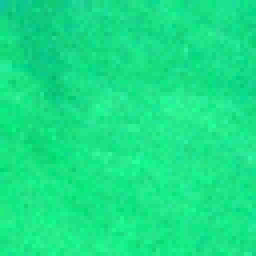

In [17]:
# Preview a train data image
print(train_labels[0])
array_to_img(train_images[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


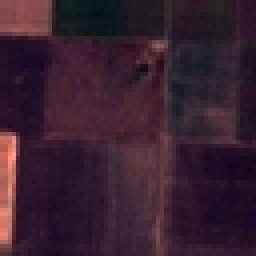

In [18]:
# Preview a test data image
print(test_labels[0])
array_to_img(test_images[0])

In [20]:
train_folder = 'data/split/train'
test_folder = 'data/split/test'

# Normalize images
train16_gen = ImageDataGenerator(rescale=1./255,
                               preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                               validation_split = 0.125)
test16_gen = ImageDataGenerator(rescale=1./255,
                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
vgg16_train_generator = train16_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

vgg16_val_generator= train16_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

vgg16_test_generator= test16_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [21]:
#Reshape our input
vgg16 = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(256, 256, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
#Check to ensure there is no prediction layer
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Instantiate a Sequential model
vgg16_model = Sequential()

#Input Layer
vgg16_model.add(vgg16)

vgg16_model.add(layers.Flatten())

#Add Dense Layer
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dropout(0.2))

#Add Dense Layer
vgg16_model.add(layers.Dense(64, activation='relu'))
vgg16_model.add(layers.Dropout(0.2))

#Output Layer
vgg16_model.add(layers.Dense(10, activation='softmax'))

In [24]:
#Freeze our VGG19 Layer
vgg16.trainable = False

#Sanity check that VGG19 Layer is frozen
for layer in vgg16_model.layers:
    print(layer.name, layer.trainable)

vgg16 False
flatten True
dense True
dropout True
dense_1 True
dropout_1 True
dense_2 True


In [25]:
#Compile the model- adam optimizer, categorical_crossentropy loss, and set our metric to accuracy
vgg16_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
vgg16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,525,898 (120.26 MB)

 Trainable params: 16,811,210 (64.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
# Define Stopping Criteria
valcallback = [EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 5),]
# Fit the model
vgg16_model_history = vgg16_model.fit(vgg16_train_generator,
                                  epochs= 50,
                                  validation_data = vgg16_val_generator,
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.3318 - loss: 1.9424 - val_accuracy: 0.7356 - val_loss: 0.8087
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 122s 812ms/step - accuracy: 0.6948 - loss: 0.8774 - val_accuracy: 0.8130 - val_loss: 0.5824
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 116s 771ms/step - accuracy: 0.7691 - loss: 0.6680 - val_accuracy: 0.8237 - val_loss: 0.5197
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 116s 769ms/step - accuracy: 0.8058 - loss: 0.5763 - val_accuracy: 0.8363 - val_loss: 0.4996
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 116s 766ms/step - accuracy: 0.8226 - loss: 0.5239 - val_accuracy: 0.8407 - val_loss: 0.4649
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 142s 768ms/step - accuracy: 0.8369 - loss: 0.4705 - val_accuracy: 0.8437 - val_loss: 0.4507
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 116s 767ms/step - accuracy: 0.8419 - loss: 0.4650 - val_accuracy: 0.8285 - val_loss: 0.4933
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 116s 767ms/step - accuracy: 0.8302 - loss: 0.4759 

In [27]:
# Check loss and accuracy on test data
test_loss, test_acc = vgg16_model.evaluate(vgg16_test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 993ms/step - accuracy: 0.8663 - loss: 0.4452
Test loss:  0.45148685574531555
Test accuracy:  0.8587037324905396


In [28]:
train_folder = 'data/split/train'
test_folder = 'data/split/test'

# Normalize images
train_aug16_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.3,
                                     rotation_range=50,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest',
                                     preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                     validation_split = 0.125)

val_aug16_gen = ImageDataGenerator(rescale=1./255,
                               preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                               validation_split = 0.125)

test_aug16_gen = ImageDataGenerator(rescale=1./255,
                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
aug16_train_generator = train_aug16_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

aug16_val_generator= val_aug16_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

aug16_test_generator= test_aug16_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [29]:
#Reshape our input
vgg16 = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(256, 256, 3))

In [30]:
#Instantiate a Sequential model
aug_vgg16_model = Sequential()

#Input Layer
aug_vgg16_model.add(vgg16)

aug_vgg16_model.add(layers.Flatten())

#Add Dense Layer
aug_vgg16_model.add(layers.Dense(512, activation='relu'))
aug_vgg16_model.add(layers.Dropout(0.3))

#Add Dense Layer
aug_vgg16_model.add(layers.Dense(64, activation='relu'))
aug_vgg16_model.add(layers.Dropout(0.3))

#Output Layer
aug_vgg16_model.add(layers.Dense(10, activation='softmax'))

In [31]:
# View number of layers in the vgg16 base model
print("Number of layers in the VGG16 base model: ", len(vgg16.layers))

Number of layers in the VGG16 base model:  19


In [32]:
# Fine-tune from layer 15 onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg16.layers[:fine_tune_at]:
  layer.trainable = False

In [33]:
#Sanity check that VGG19 Layer is frozen
for layer in aug_vgg16_model.layers:
    print(layer.name, layer.trainable)

vgg16 True
flatten_1 True
dense_3 True
dropout_2 True
dense_4 True
dropout_3 True
dense_5 True


In [34]:
#Check that there is no prediction layer and the split between trainable/non-trainable parameters.
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [35]:
#Compile the model- adam optimizer, categorical_crossentropy loss, and set our metric to accuracy
aug_vgg16_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
aug_vgg16_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,525,898 (120.26 MB)

 Trainable params: 23,890,634 (91.14 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.mixed_precision import Policy, set_global_policy
from keras.backend import clear_session

# Clear previous models from memory
clear_session()

# Enable mixed precision training to optimize memory usage
policy = Policy('mixed_float16')
set_global_policy(policy)

# Initialize ImageDataGenerator with smaller image sizes and reduced batch size
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'data/split/train/',
    target_size=(150, 150),  # Optimized image size
    batch_size=8,           # Reduced batch size
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'data/split/test/',
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers to save memory
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax', dtype='float32')(x)  # Output is explicitly set to float32

# Create the full model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Save the model
model.save('/content/vgg16_optimized_model.h5')


Found 17280 images belonging to 10 classes.
Found 1080 images belonging to 10 classes.
Epoch 1/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6880 - loss: 0.8973 - val_accuracy: 0.8176 - val_loss: 0.4953
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2160/2160 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.8557 - loss: 0.4211 - val_accuracy: 0.8407 - val_loss: 0.4041
Epoch 4/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8839 - loss: 0.3381 - val_accuracy: 0.8685 - val_loss: 0.3835
Epoch 6/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9008 - loss: 0.2819 - val_accuracy: 0.8611 - val_loss: 0.4014
Epoch 8/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9189 - loss: 0.2414 - val_accuracy: 0.8593 - val_loss: 0.4175
Epoch 10/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [47]:
from sklearn.metrics import classification_report, accuracy_score, precision_score
import numpy as np

# Load the saved model (if needed)
# from tensorflow.keras.models import load_model
# model = load_model('/content/vgg16_optimized_model.h5')

# Prepare the test dataset
test_generator = datagen.flow_from_directory(
    'data/split/test//',
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get class labels

# Predict on test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision (macro and weighted)
precision_macro = precision_score(true_labels, predicted_classes, average='macro')
precision_weighted = precision_score(true_labels, predicted_classes, average='weighted')

print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Precision (Weighted): {precision_weighted:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))


Found 5400 images belonging to 10 classes.
675/675 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Accuracy: 96.57%
Precision (Macro): 0.87
Precision (Weighted): 0.87

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.84      0.92      0.88       600
              Forest       0.84      0.95      0.89       600
HerbaceousVegetation       0.94      0.77      0.85       600
             Highway       0.90      0.70      0.79       500
          Industrial       0.98      0.86      0.91       500
             Pasture       0.84      0.78      0.81       400
       PermanentCrop       0.73      0.85      0.79       500
         Residential       0.92      0.99      0.95       600
               River       0.76      0.78      0.77       500
             SeaLake       0.92      0.99      0.95       600

            accuracy                           0.87      5400
           macro avg       0.87      0.86      0.86      5400
        weighted

135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


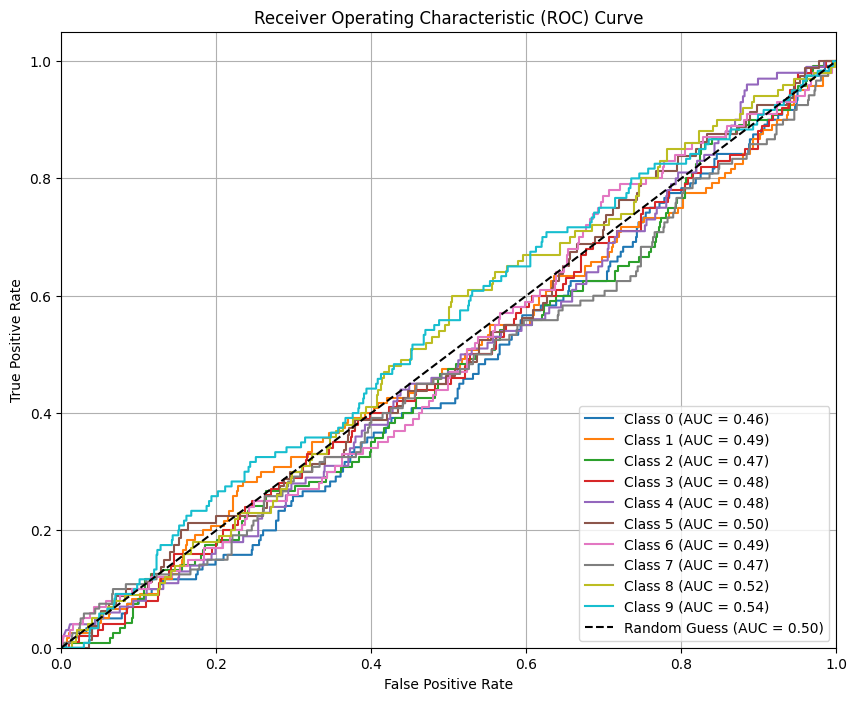

Micro-Average AUC: 0.49


In [49]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define num_classes based on your data
num_classes = len(val_generator.class_indices)  # Extract the number of classes from the generator

# Get the true labels and predictions
y_true = val_generator.classes  # True class labels from the validation generator
y_pred = model.predict(val_generator)  # Predicted probabilities

# One-hot encode the true labels if not already one-hot encoded
y_true = to_categorical(y_true, num_classes=num_classes)

# Calculate ROC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculate micro-average AUC (useful for multi-class classification)
y_true_flat = y_true.ravel()
y_pred_flat = y_pred.ravel()
micro_auc = auc(*roc_curve(y_true_flat, y_pred_flat)[:2])

print(f"Micro-Average AUC: {micro_auc:.2f}")


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


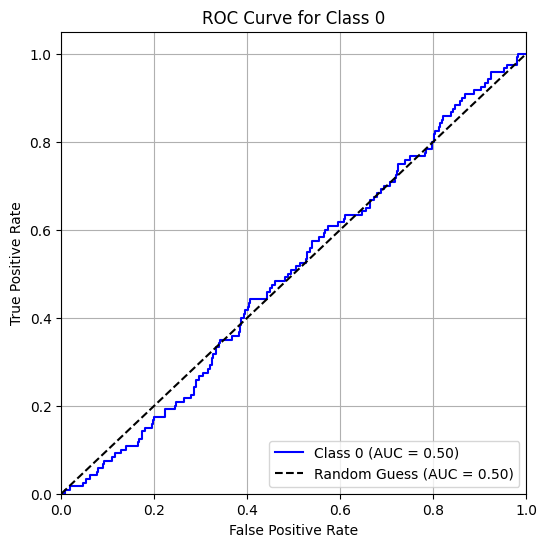

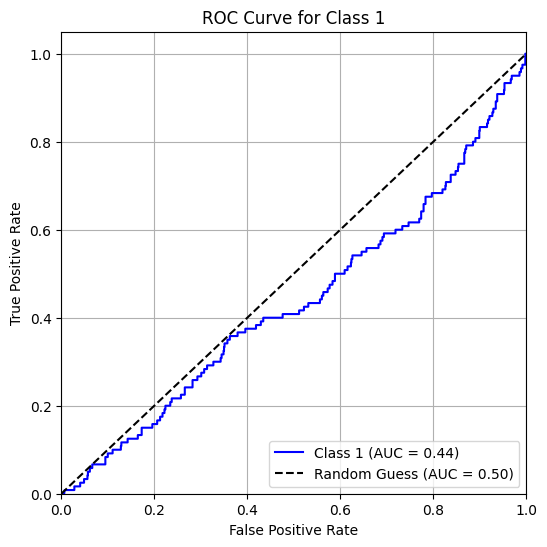

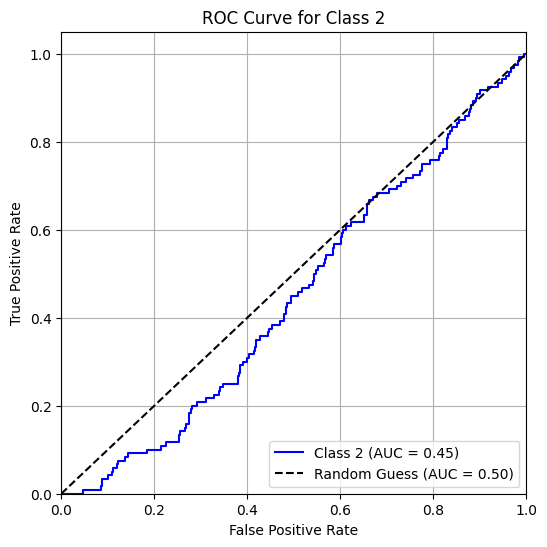

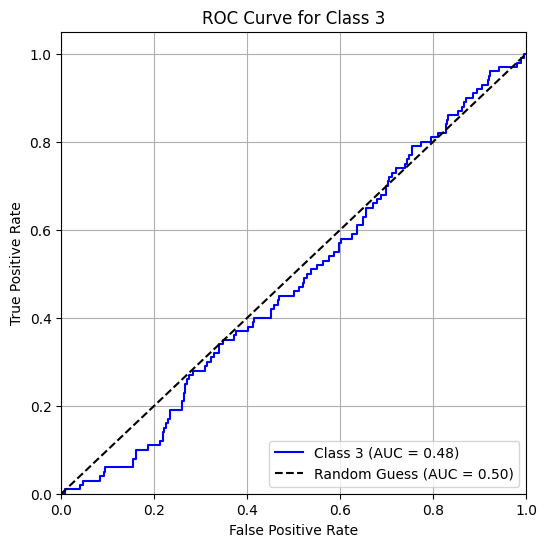

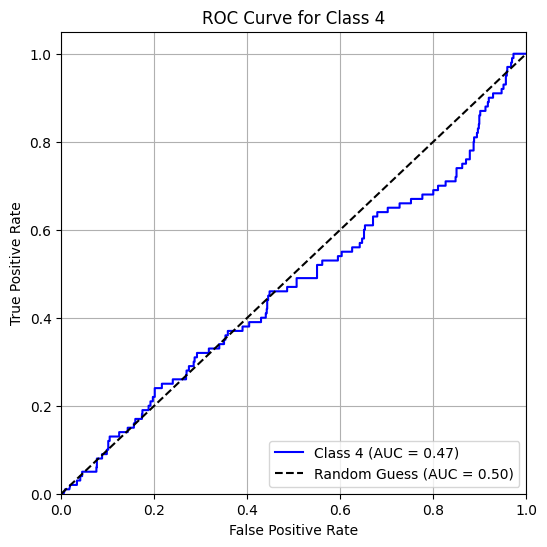

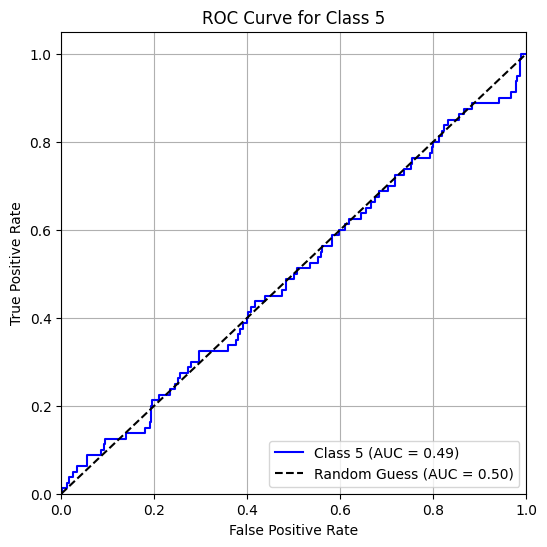

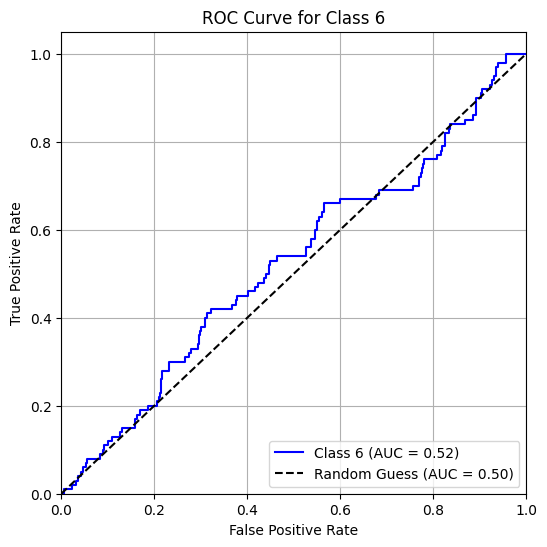

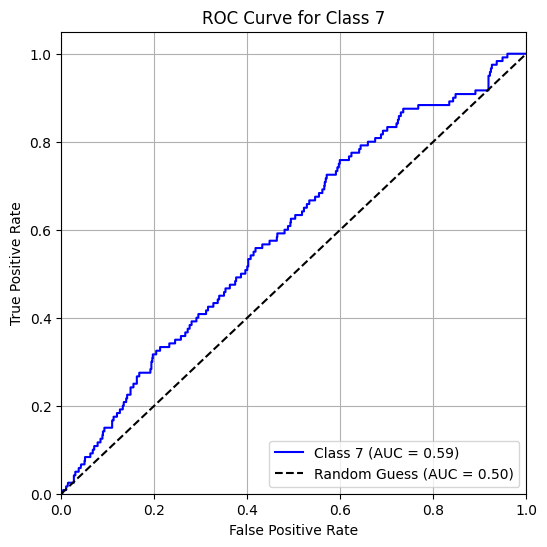

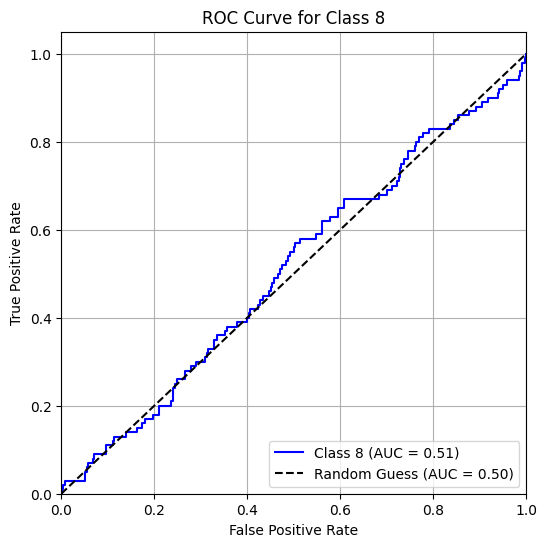

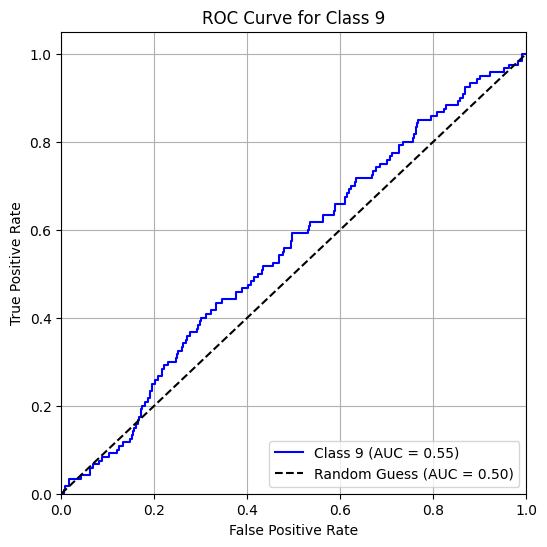

In [51]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define num_classes based on your data
num_classes = len(val_generator.class_indices)  # Extract the number of classes from the generator

# Get the true labels and predictions
y_true = val_generator.classes  # True class labels from the validation generator
y_pred = model.predict(val_generator)  # Predicted probabilities

# One-hot encode the true labels if not already one-hot encoded
y_true = to_categorical(y_true, num_classes=num_classes)

# Calculate ROC and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class separately
for i in range(num_classes):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], color='blue', label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for Class {i}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


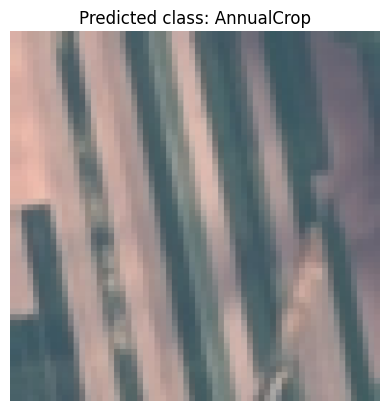

Predicted class: AnnualCrop


In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model (assuming it's already saved)
# vgg16_model = load_model('/path_to_your_model.h5')

# Load the image you want to classify
img_path = '/content/AnnualCrop_176.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(256, 256))  # Resize to the input size the model expects

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # VGG16-specific preprocessing

# Predict the class probabilities
predictions = vgg16_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Load class labels from the generator (assuming the train generator is available)
class_labels = vgg16_train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary to get class names

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]
plt.imshow(img)  # Display the image
plt.title(f"Predicted class: {predicted_class_label}")  # Title with predicted class
plt.axis('off')  # Hide axis
plt.show()
# Output the prediction
print(f"Predicted class: {predicted_class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


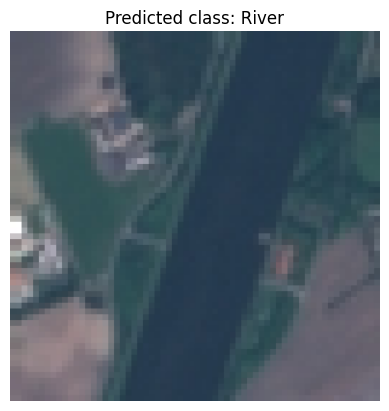

Predicted class: River


In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model (assuming it's already saved)
# vgg16_model = load_model('/path_to_your_model.h5')

# Load the image you want to classify
img_path = '/content/River_179.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(256, 256))  # Resize to the input size the model expects

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # VGG16-specific preprocessing

# Predict the class probabilities
predictions = vgg16_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Load class labels from the generator (assuming the train generator is available)
class_labels = vgg16_train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary to get class names

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]
plt.imshow(img)  # Display the image
plt.title(f"Predicted class: {predicted_class_label}")  # Title with predicted class
plt.axis('off')  # Hide axis
plt.show()
# Output the prediction
print(f"Predicted class: {predicted_class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


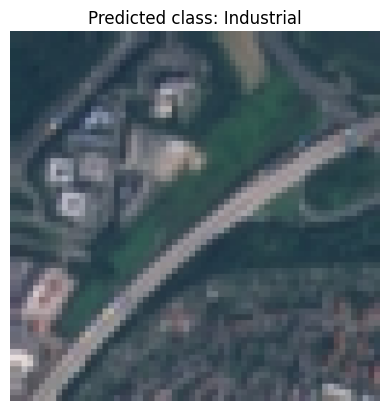

Predicted class: Industrial


In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model (assuming it's already saved)
# vgg16_model = load_model('/path_to_your_model.h5')

# Load the image you want to classify
img_path = '/content/Highway_122.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(256, 256))  # Resize to the input size the model expects

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # VGG16-specific preprocessing

# Predict the class probabilities
predictions = vgg16_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Load class labels from the generator (assuming the train generator is available)
class_labels = vgg16_train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary to get class names

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]
plt.imshow(img)  # Display the image
plt.title(f"Predicted class: {predicted_class_label}")  # Title with predicted class
plt.axis('off')  # Hide axis
plt.show()
# Output the prediction
print(f"Predicted class: {predicted_class_label}")
